In [1]:
import requests
import os
import json
from dotenv import load_dotenv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tweepy
import pandas as pd
import yfinance as yf
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
load_dotenv() #Loads environment variables stored in .env file




True

In [2]:
auth = tweepy.OAuthHandler(f"{os.environ.get('twitter_KEY')}", f"{os.environ.get('twitter_SECRET_KEY')}")
auth.set_access_token(f"{os.environ.get('twitter_ACCESS_TOKEN')}",f"{os.environ.get('twitter_SECRET_ACCESS_TOKEN')}")
api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)
try:
    api.verify_credentials()
    print("gogo")
except:
    print("Error during authentication")


gogo


In [3]:
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    # print("Overall sentiment dictionary is : ", sentiment_dict) 
    # print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    # print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    # print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    # print("Sentence Overall Rated As", end = " ") 
  
    # # decide sentiment as positive, negative and neutral 
    # if sentiment_dict['compound'] >= 0.05 : 
    #     print("Positive") 
  
    # elif sentiment_dict['compound'] <= - 0.05 : 
    #     print("Negative") 
  
    # else : 
    #     print("Neutral") 
    return sentiment_dict

In [4]:
# x=0
# ticker = 'AAPL'
# tweet_dict = {}
# api_search = api.search(q=ticker,lang='en', until=(dt.datetime.now()-dt.timedelta(days=5)).strftime('%Y-%m-%d'), count=1000)

# for tweet in api_search:
#     x+=1
#     tweet_dict.update({'text':tweet.text, 'ticker': ticker, 'follower_count': tweet.user.followers_count, 'date': tweet.created_at, 'sentiment': sentiment_scores(tweet.text)})
#     print(tweet.user.followers_count)
#     print(tweet.text)
#     print(sentiment_scores(tweet.text))

In [5]:
# pd.DataFrame({'Ticker': [ticker for x in api_search], 
#               'Text': [tweet.text for tweet in api_search], 
#               'follower_count': [tweet.user.followers_count for tweet in api_search], 
#               'positive': [sentiment_scores(tweet.text)['pos'] for tweet in api_search], 
#               'negative': [sentiment_scores(tweet.text)['neg'] for tweet in api_search], 
#               'neutral': [sentiment_scores(tweet.text)['neu'] for tweet in api_search], 
#               'created': [tweet.created_at for tweet in api_search]})


In [6]:
# tweet_dict = {'ticker': [], 
#               'text': [], 
#               'follower_count': [], 
#               'positive': [], 
#               'negative': [], 
#               'neutral': [],
#               'compound':[], 
#               'created': []}
# ticker = 'CSCO'
# market_open_dt = (stock_df['Datetime'].min()).strftime('%Y-%m-%d')
# market_close_dt = (stock_df['Datetime'].max()+ dt.timedelta(days=1)).strftime('%Y-%m-%d') 
# print(market_open_dt)
# print(market_close_dt)
# compound_sum = 0
# count_of_tweets = 0
# for page in tweepy.Cursor(api.search,q=ticker, tweet_mode='extended', lang='en', until=market_close_dt,since=market_open_dt, count=100).pages(5):
#     for tweet in page:
#         if tweet.user.followers_count > 500:
#             scores = sentiment_scores(tweet.full_text)
#             tweet_dict['ticker'].append(ticker)
#             tweet_dict['text'].append(tweet.full_text)
#             tweet_dict['follower_count'].append(tweet.user.followers_count)
#             tweet_dict['positive'].append(scores['pos'])
#             tweet_dict['negative'].append(scores['neg'])
#             tweet_dict['neutral'].append(scores['neu'])
#             tweet_dict['compound'].append(scores['compound'])
#             tweet_dict['created'].append(tweet.created_at)
#             count_of_tweets+=1
#             compound_sum += scores['compound']
# print('Avg Compound:')
# print(compound_sum/count_of_tweets)

In [7]:
ticker_list = ['WMT', 'NIO', 'CYDY', 'PLTR','aapl','msft']
not_retweet = '-is:retweet -is:nullcast'

In [8]:
master = pd.DataFrame(columns=['Date','Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends','Stock Splits', 'Avg_Compound'])
for ticker in ticker_list:
    new_stock = yf.Ticker(ticker)
    past_five = new_stock.history(period='7d', interval='1d').reset_index()
    past_five['Ticker']= [ticker for index, row in past_five.iterrows()]
    compound_scores = []
    paging = 1
    for index,row in past_five.iterrows():
        start_date = row['Date']
        end_date=row['Date'] + dt.timedelta(days=1)
        compound_sum = 0
        count_of_tweets = 0
        print('PAGE', paging)
        paging+=1
        for page in tweepy.Cursor(api.search,q=ticker+not_retweet, tweet_mode='extended', lang='en', until=end_date,since=start_date, count=100).pages(2):
            for tweet in page:
                if tweet.user.followers_count > 300:
                    scores = sentiment_scores(tweet.full_text)
                    count_of_tweets+=1
                    compound_sum += scores['compound']
        try:
            compound_scores.append(compound_sum/count_of_tweets)
        except ZeroDivisionError:
            print(count_of_tweets)
            compound_scores.append(0)

    past_five['Avg_Compound'] = compound_scores
    past_five['diff'] = past_five['Open'].diff()
    past_five = past_five.drop(index=0)
    master = pd.concat([master, past_five])
master=master.reset_index().drop(columns='index')

PAGE 1
0
PAGE 2
PAGE 3
PAGE 4
PAGE 5
PAGE 6
PAGE 7
PAGE 1
0
PAGE 2
PAGE 3
PAGE 4
PAGE 5
PAGE 6
PAGE 7
PAGE 1
0
PAGE 2
0
PAGE 3
PAGE 4
PAGE 5
PAGE 6
PAGE 7
PAGE 1
0
PAGE 2
PAGE 3
PAGE 4
PAGE 5
PAGE 6
PAGE 7
PAGE 1
0
PAGE 2
PAGE 3
PAGE 4
PAGE 5
PAGE 6
PAGE 7
PAGE 1
0
PAGE 2
PAGE 3
PAGE 4
PAGE 5
PAGE 6
PAGE 7


In [24]:
X = master['Avg_Compound'].values.reshape(-1,1)
y = master['diff'].values.reshape(-1,1)

master

,Date,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,Avg_Compound,diff,sentiment,neg,neut,pos,binned
0,2021-01-25,WMT,145.360001,146.250000,144.270004,146.199997,6343700,0,0,0.431217,-0.240005,pos,0,0,1,3
1,2021-01-26,WMT,145.630005,147.809998,145.470001,147.509995,5010500,0,0,0.490080,0.270004,pos,0,0,1,4
2,2021-01-27,WMT,146.960007,147.860001,143.550003,143.839996,9970100,0,0,0.127340,1.330002,pos,0,0,1,4
3,2021-01-28,WMT,144.460007,146.259995,143.630005,143.750000,7433900,0,0,0.145200,-2.500000,pos,0,0,1,2
4,2021-01-29,WMT,143.179993,143.750000,140.350006,140.490005,10825900,0,0,-0.510600,-1.280014,neg,1,0,0,3
5,2021-02-01,WMT,140.910004,141.490005,139.190002,139.270004,7596911,0,0,0.000000,-2.269989,neut,0,1,0,2
6,2021-01-25,NIO,64.050003,64.519997,58.349998,59.990002,111986400,0,0,0.101257,5.100002,pos,0,0,1,6
7,2021-01-26,NIO,60.040001,60.669998,58.639999,60.310001,70393300,0,0,0.333292,-4.010002,pos,0,0,1,1
8,2021-01-27,NIO,57.950001,59.790001,56.599998,57.150002,73078300,0,0,0.017371,-2.090000,neut,0,1,0,2
9,2021-01-28,NIO,56.759998,59.459999,55.150002,58.369999,73955100,0,0,0.023377,-1.190002,neut,0,1,0,3


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 
print('score', model.score(X,y))
master['diff'].describe()

Weight coefficients:  [[0.08660181]]
y-axis intercept:  [0.29685528]
score 3.842782726792837e-05


count    36.000000
mean      0.311667
std       3.088833
min      -4.010002
25%      -2.082501
50%      -0.155007
75%       0.857501
max       8.609999
Name: diff, dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

In [27]:
model.fit(X_scaled, y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model.score(X_scaled,y_scaled)

3.842782726792837e-05

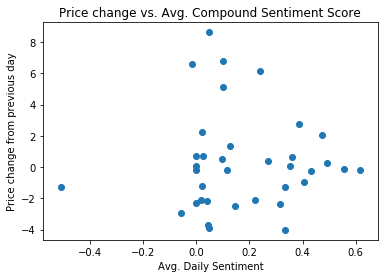

In [36]:
plt.scatter(X,y)
plt.title('Price change vs. Avg. Compound Sentiment Score')
plt.xlabel('Avg. Daily Sentiment')
plt.ylabel('Price change from previous day')
plt.savefig("../../static/pics/scatter.png")

In [37]:
classy_list = []
for index,row in master.iterrows():
    if row['Avg_Compound'] >0.05:
        classy_list.append('pos')
    elif row['Avg_Compound']<=-0.05:
        classy_list.append('neg')
    else:
        classy_list.append('neut')
master['sentiment'] = classy_list
try:
    master.drop(columns=['level_0','index'], inplace=True)
except KeyError:
    try:
        master.drop(columns=['index'], inplace=True)
    except KeyError:
        next

In [38]:
master[['neg','neut','pos']] = pd.get_dummies(master['sentiment'])
X = master[['pos', 'neg', 'neut']]
y = master['diff'].values.reshape(-1,1)
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

In [39]:
master['diff'].describe()
bins = [-6,-4,-2,0,2,4,6,8,10]
labels = [1,2,3,4,5,6,7,8]
master['binned']=pd.cut(master['diff'], bins=bins, labels=labels)
master

,Date,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,Avg_Compound,diff,sentiment,neg,neut,pos,binned
0,2021-01-25,WMT,145.360001,146.250000,144.270004,146.199997,6343700,0,0,0.431217,-0.240005,pos,0,0,1,3
1,2021-01-26,WMT,145.630005,147.809998,145.470001,147.509995,5010500,0,0,0.490080,0.270004,pos,0,0,1,4
2,2021-01-27,WMT,146.960007,147.860001,143.550003,143.839996,9970100,0,0,0.127340,1.330002,pos,0,0,1,4
3,2021-01-28,WMT,144.460007,146.259995,143.630005,143.750000,7433900,0,0,0.145200,-2.500000,pos,0,0,1,2
4,2021-01-29,WMT,143.179993,143.750000,140.350006,140.490005,10825900,0,0,-0.510600,-1.280014,neg,1,0,0,3
5,2021-02-01,WMT,140.910004,141.490005,139.190002,139.270004,7596911,0,0,0.000000,-2.269989,neut,0,1,0,2
6,2021-01-25,NIO,64.050003,64.519997,58.349998,59.990002,111986400,0,0,0.101257,5.100002,pos,0,0,1,6
7,2021-01-26,NIO,60.040001,60.669998,58.639999,60.310001,70393300,0,0,0.333292,-4.010002,pos,0,0,1,1
8,2021-01-27,NIO,57.950001,59.790001,56.599998,57.150002,73078300,0,0,0.017371,-2.090000,neut,0,1,0,2
9,2021-01-28,NIO,56.759998,59.459999,55.150002,58.369999,73955100,0,0,0.023377,-1.190002,neut,0,1,0,3


In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = master[['pos', 'neg', 'neut']]
y = master['binned']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.score(X, y)

0.3333333333333333

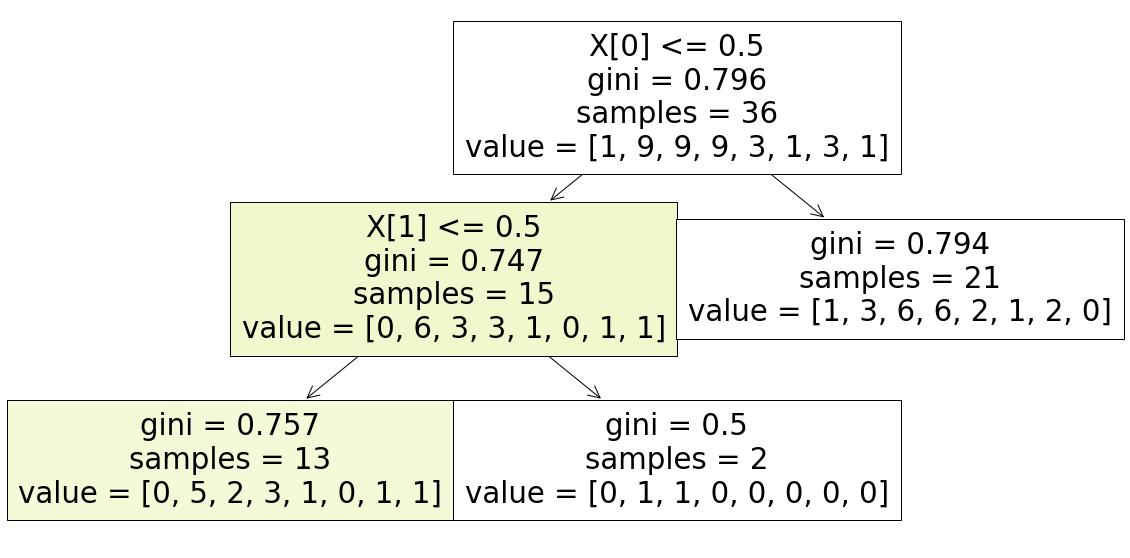

<Figure size 432x288 with 0 Axes>

In [45]:
model_all_params = clf
# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.show()
plt.savefig("../../static/pics/tree.png")

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X, y)


0.3333333333333333

No handles with labels found to put in legend.


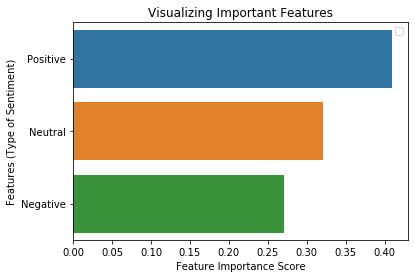

In [49]:
importances = rf.feature_importances_
feature_imp = pd.Series(rf.feature_importances_,index=['pos', 'neg', 'neut']).sort_values(ascending=False)
import seaborn as sns

# Creating a bar plot
sns.barplot(x=feature_imp, y=['Positive', 'Neutral', 'Negative'])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features (Type of Sentiment)')
# plt.yticks(labels=["Positive Sentiment", 'Neutral Sentiment', 'Negative Sentiment'])
plt.title("Visualizing Important Features")
plt.legend()

plt.savefig("../../static/pics/bar.png")
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    print(k)
    print(knn.score(X,y))

1
0.3333333333333333
3
0.3333333333333333
5
0.3333333333333333
7
0.3333333333333333
9
0.2777777777777778
11
0.3333333333333333
13
0.3333333333333333
15
0.3333333333333333
17
0.3333333333333333
19
0.3333333333333333
